In [1]:
from planetengine import frame

In [2]:
model = frame.load_frame('../data/tests/MS98Xtest')

avTemp 0.57
avVisc 4.0E+03
modeltime 0.0E+00
Nu 0.9
step 0
surfVRMS 9.06
VRMS 190.43
yielding 6%
fig



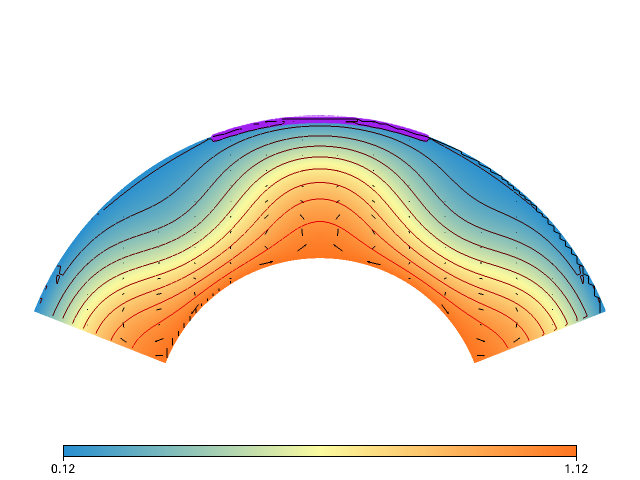

In [3]:
model.report()

In [4]:
model.load_checkpoint(4000)

Loading checkpoint...
Checkpoint successfully loaded.


avTemp 0.64
avVisc 7.9E+02
modeltime 3.5E-02
Nu 4.7
step 4000
surfVRMS 91.62
VRMS 128.26
yielding 6%
fig



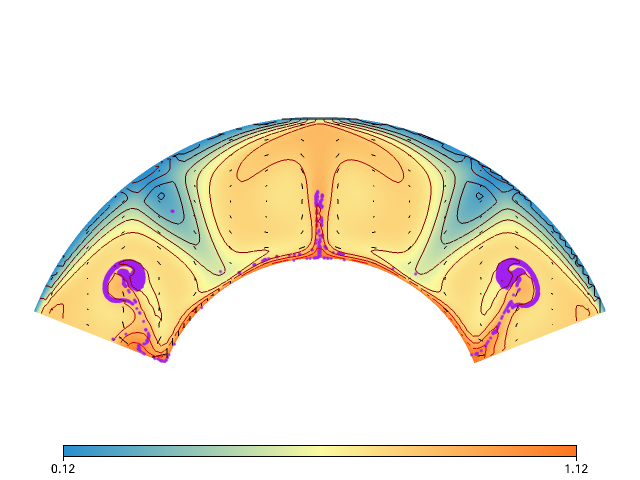

In [5]:
model.report()

In [6]:
from planetengine.utilities import quickShow

In [7]:
import underworld as uw
from underworld import function as fn

In [8]:
model.system.viscosityFn.evaluate(model.system.swarm)

array([[  6.77480040e+01],
       [  6.40391410e+00],
       [  7.84144413e+03],
       ..., 
       [  4.89841297e+01],
       [  1.03648774e+02],
       [  1.02694300e+02]])

In [9]:
model.system.buoyancyFn.evaluate(model.system.swarm)

array([[ 6377967.81168679,  3143476.26722514],
       [ 8314034.74773443,  4383281.70529403],
       [ 1754216.01465456,  1289977.40947437],
       ..., 
       [-6048715.61151969,  4306458.42738261],
       [-5414781.88119924,  3942640.35768678],
       [-5426370.43567674,  3941963.87557467]])

In [10]:
buoyancyProj = uw.mesh.MeshVariable(model.system.mesh, 1)
buoyancyProjector = uw.utils.MeshVariable_Projection(
    buoyancyProj,
    fn.math.dot(model.system.buoyancyFn, model.system.mesh.unitvec_r_Fn)
    )
buoyancyProjector.solve()


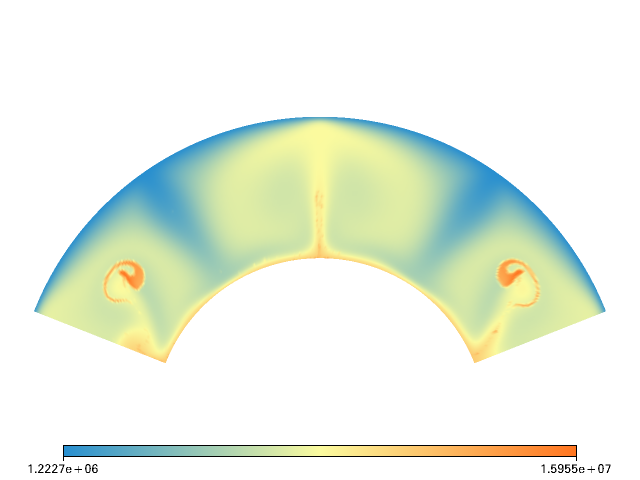

In [12]:
quickShow((model.system.mesh, buoyancyProj))

In [13]:
matBuoy = buoyancyProj / (model.system.temperatureField * 1e7)


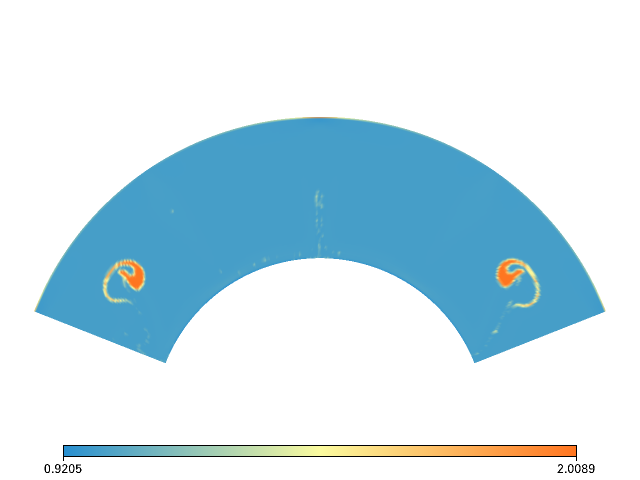

In [14]:
quickShow((model.system.mesh, matBuoy))

In [15]:
min(model.system.temperatureField.data)

array([ 0.12])


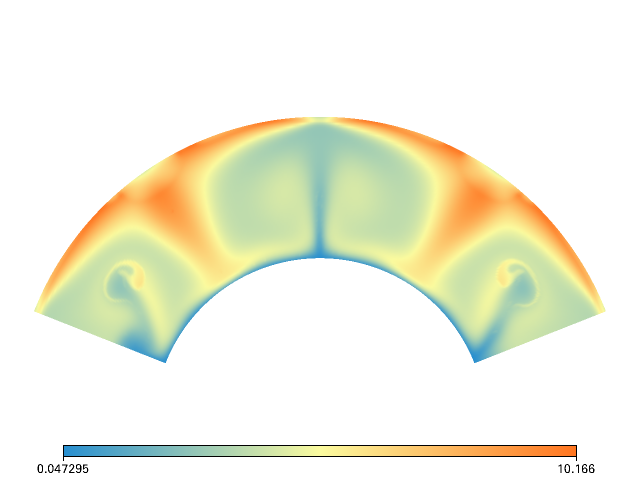

In [36]:
quickShow((model.system.mesh, fn.math.log(model.tools.projections['viscosityProj'])))